In [3]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.5638447755761442
For n_clusters = 6 The average silhouette_score is : 0.4513398152234391


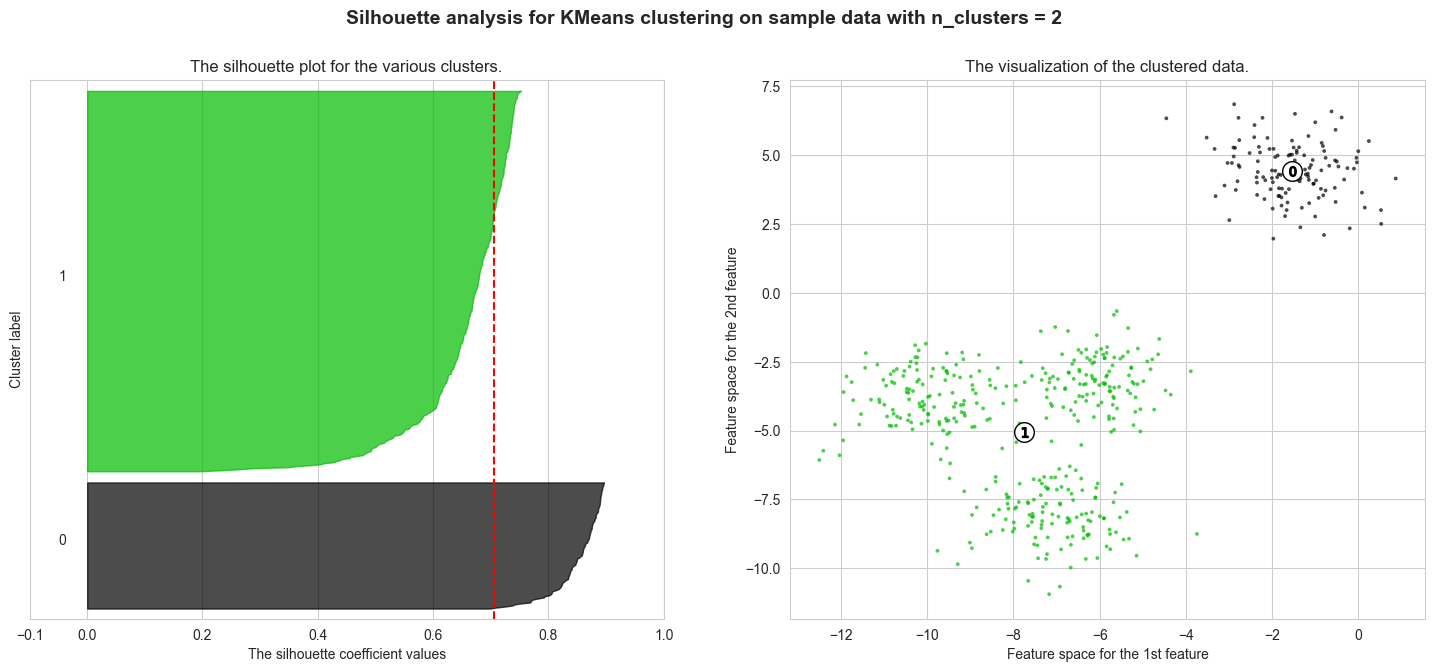

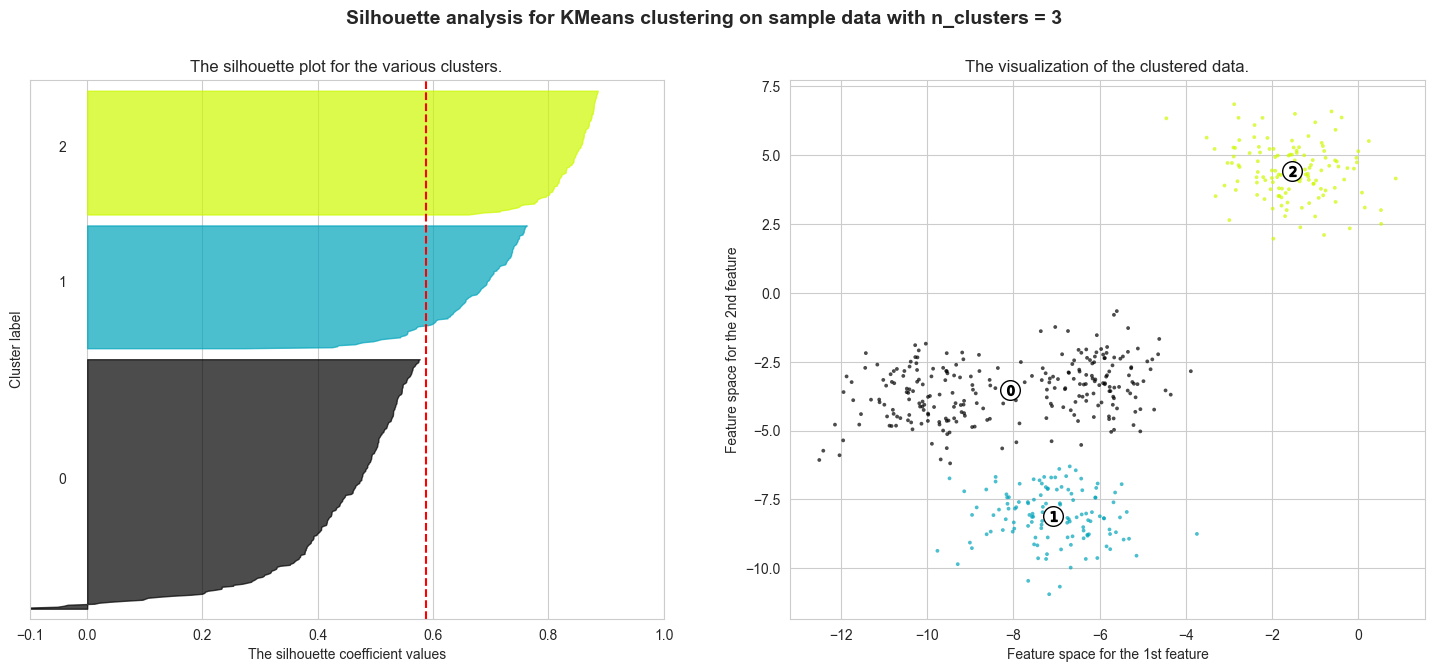

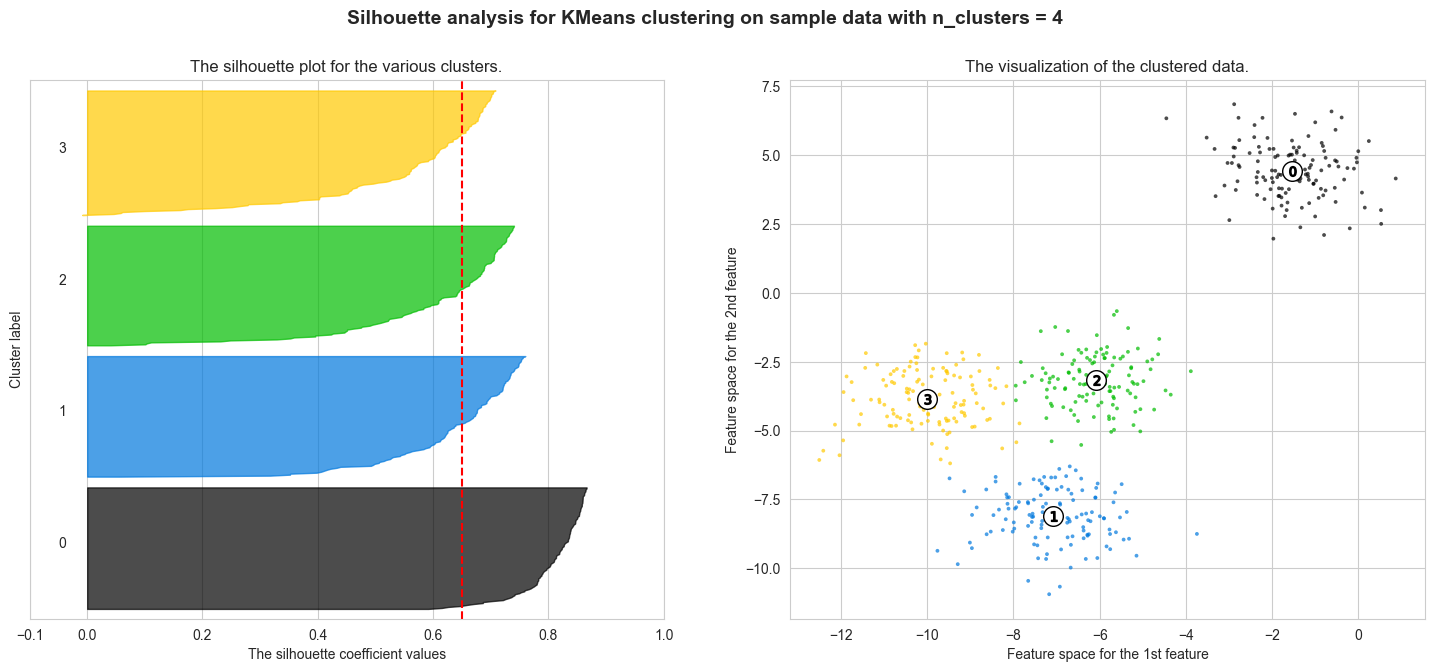

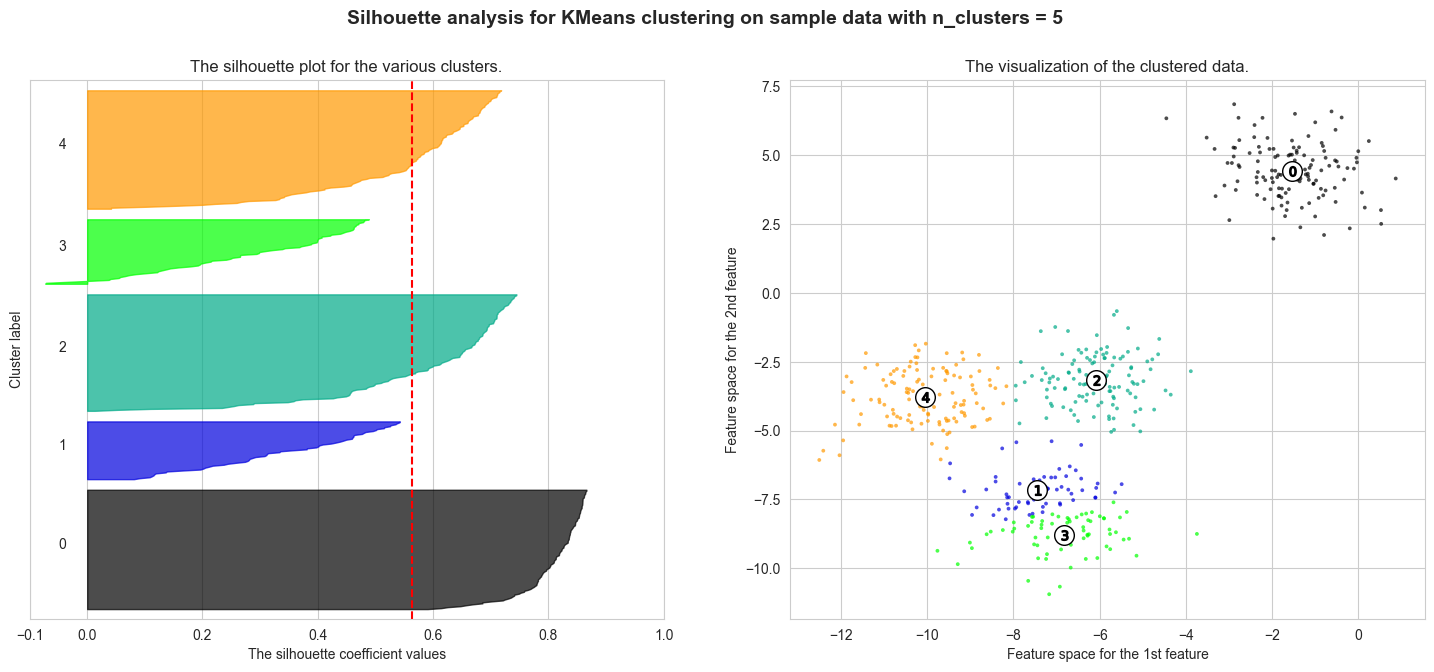

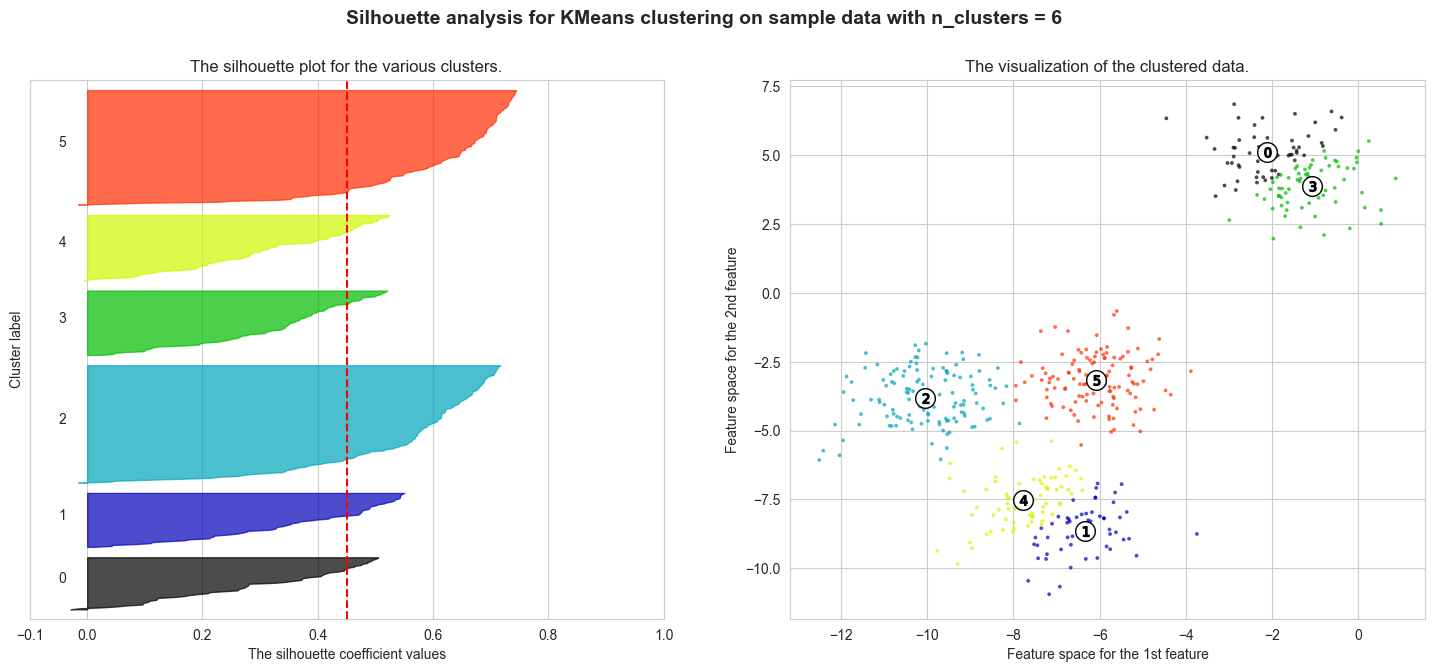

In [5]:
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1) 
# Wybór liczby skupień celem porównania 
range_n_clusters = [2, 3, 4, 5, 6]
 
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
 
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
 
    # Proszę stworzyć model klasy KMeans z liczbą klastrówn_clusters oraz losową liczbą wstępnych centroidów random_state=10
 
    clusterer = KMeans(n_clusters=n_clusters, init='random', random_state=10)
   # Naucz model - wynik predykcji
    cluster_labels = clusterer.fit_predict(X)
 
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
 
    # Wyznacz współczynnik profilu dla każdego przypadku wykorzystując funkcję silhouette_samples
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
 
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
 
        ith_cluster_silhouette_values.sort()
 
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
 
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
 
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
 
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
 
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
 
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
 
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
 
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
 
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
 
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
 
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
 
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
 
plt.show()

In [9]:
import matplotlib.pyplot as plt  
import pandas as pd  
import numpy as np  
import os
path = os.getcwd() + '/shopping_data.csv'
customer_data = pd.read_csv(path)  
 
data = customer_data.iloc[:, 3:5].values

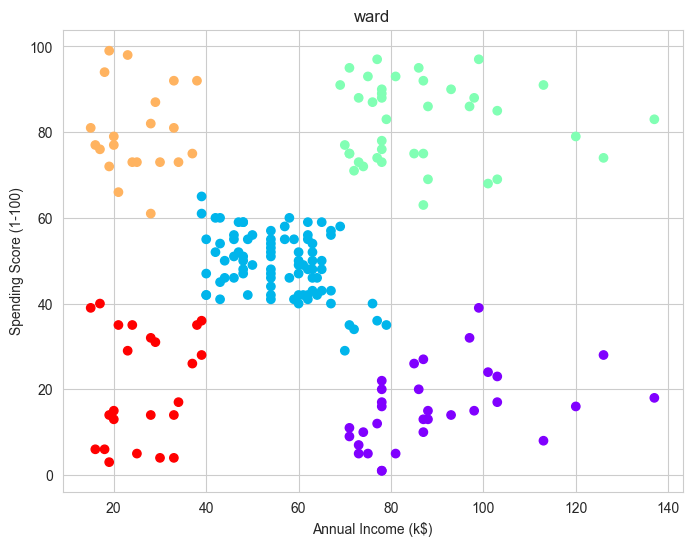

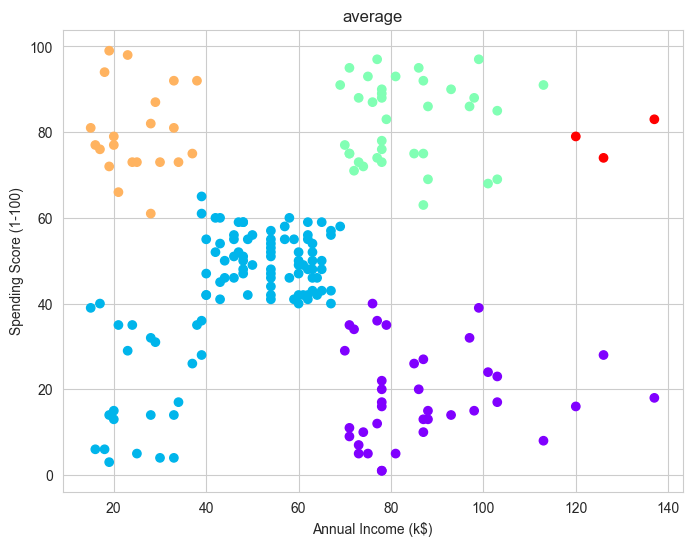

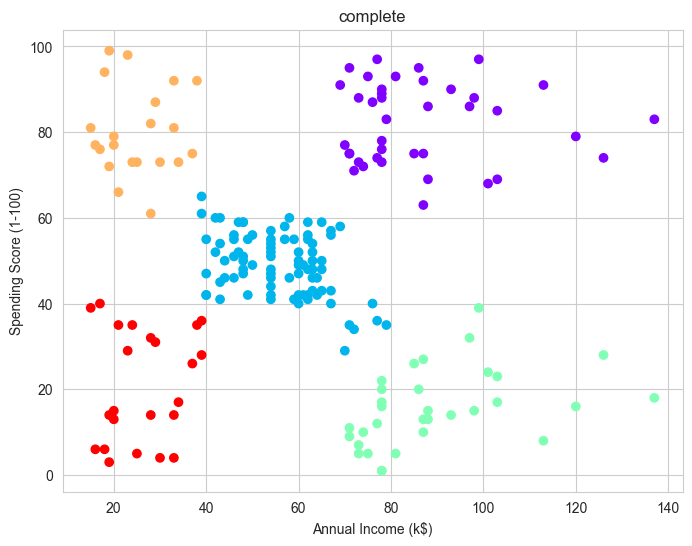

In [12]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


methods = ['ward', 'average', 'complete']

for method in methods:
    
    clusterer = AgglomerativeClustering(n_clusters=5, linkage=method)

    cluster_labels = clusterer.fit_predict(data)


    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='rainbow')
    plt.title(f'{method}')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.show()

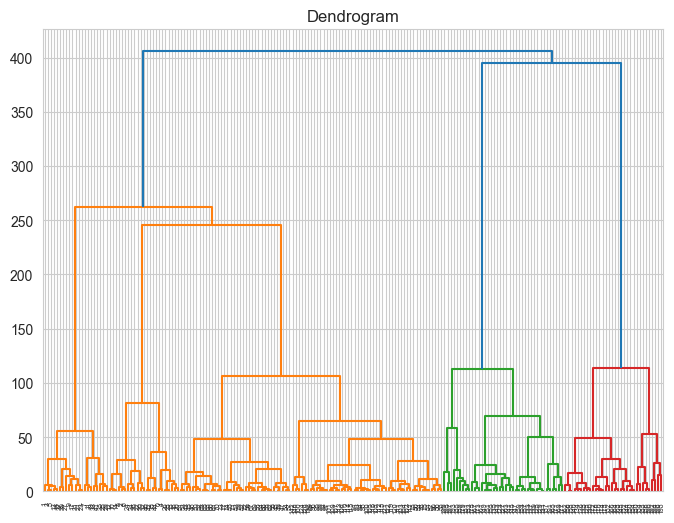

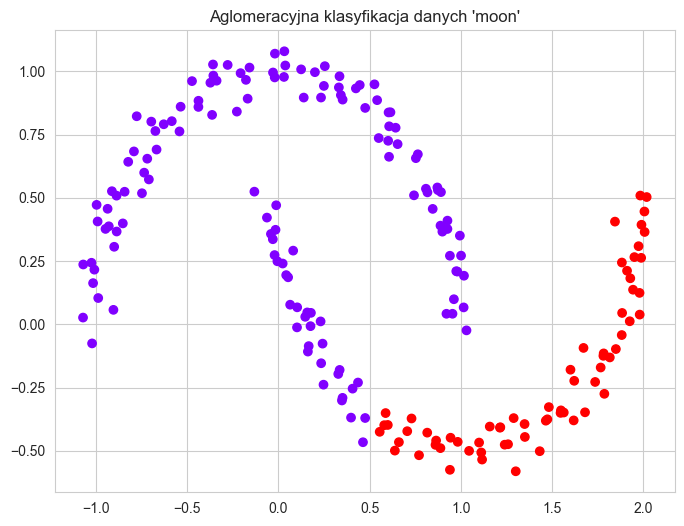

In [16]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_moons


plt.figure(figsize=(8, 6))
plt.title("Dendrogram")

Z = sch.linkage(data, method='ward')

sch.dendrogram(Z)
plt.show()


X_moon, y_moon = make_moons(n_samples=200, noise=0.05, random_state=0)

ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

y_moon_pred = ac.fit_predict(X_moon)

plt.figure(figsize=(8, 6))
plt.scatter(X_moon[:, 0], X_moon[:, 1], c=y_moon_pred, cmap=plt.cm.rainbow)
plt.title("Aglomeracyjna klasyfikacja danych 'moon'")
plt.show()
